# Import Libraries

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.9.1


# Import Dataset from csv file

In [3]:
df = pd.read_csv(r'Dataset\dataset-song-genre.csv')
print(df)

                     track_id                       artists  \
0      3txHZTpGeVASXa5ARwoRX6                        Frejat   
1      2e7LBdeiidf0ZC5Qj52u0G                         STU48   
2      0hlh787aY52rcNvJHnE0Ml             Mike NRG;Weapon X   
3      3s067jTdOv8wnuUHeXdtjT        NICO Touches the Walls   
4      4oE62AqzUuiwV09HGxiMlu       Edvard Grieg;Una Bourne   
...                       ...                           ...   
91195  0Y1hw2GXV8npQI7C21ZIT1                      Surfaces   
91196  43QSsuxazI8xms29SYCtxh                 KANA-BOON;もっさ   
91197  7nbj09isjVmgNYJ7eKBzyt                    Zach Bryan   
91198  5bVUUTXB0Dg7EzuSZC57ek  Joey Montana;Sebastian Yatra   
91199  2RjWCcfCOMzKeRJzeoe4h6            Noisia;The Upbeats   

                                album_name  \
0            Frejat Ao Vivo No Rock In Rio   
1                       無謀な夢は覚めることがない【劇場盤】   
2         Lost in Dreams (Q-Base OST 2008)   
3                                     オーロラ   
4      Mozart

In [4]:
df.shape

(91200, 20)

# Estamos verificando datos con fallas y eliminandolos del dataframe

In [5]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# volvemos datos booleanos a numéricos

In [8]:
df = df.astype({'explicit':'int'})

In [9]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
91195    0
91196    0
91197    0
91198    0
91199    0
Name: explicit, Length: 91199, dtype: int32

In [10]:
# dividing dataset to data to train and data to test
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_dataset.shape


(72959, 20)

In [12]:
test_dataset.shape

(18240, 20)

In [13]:
#know the column labels from dataset
train_dataset.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

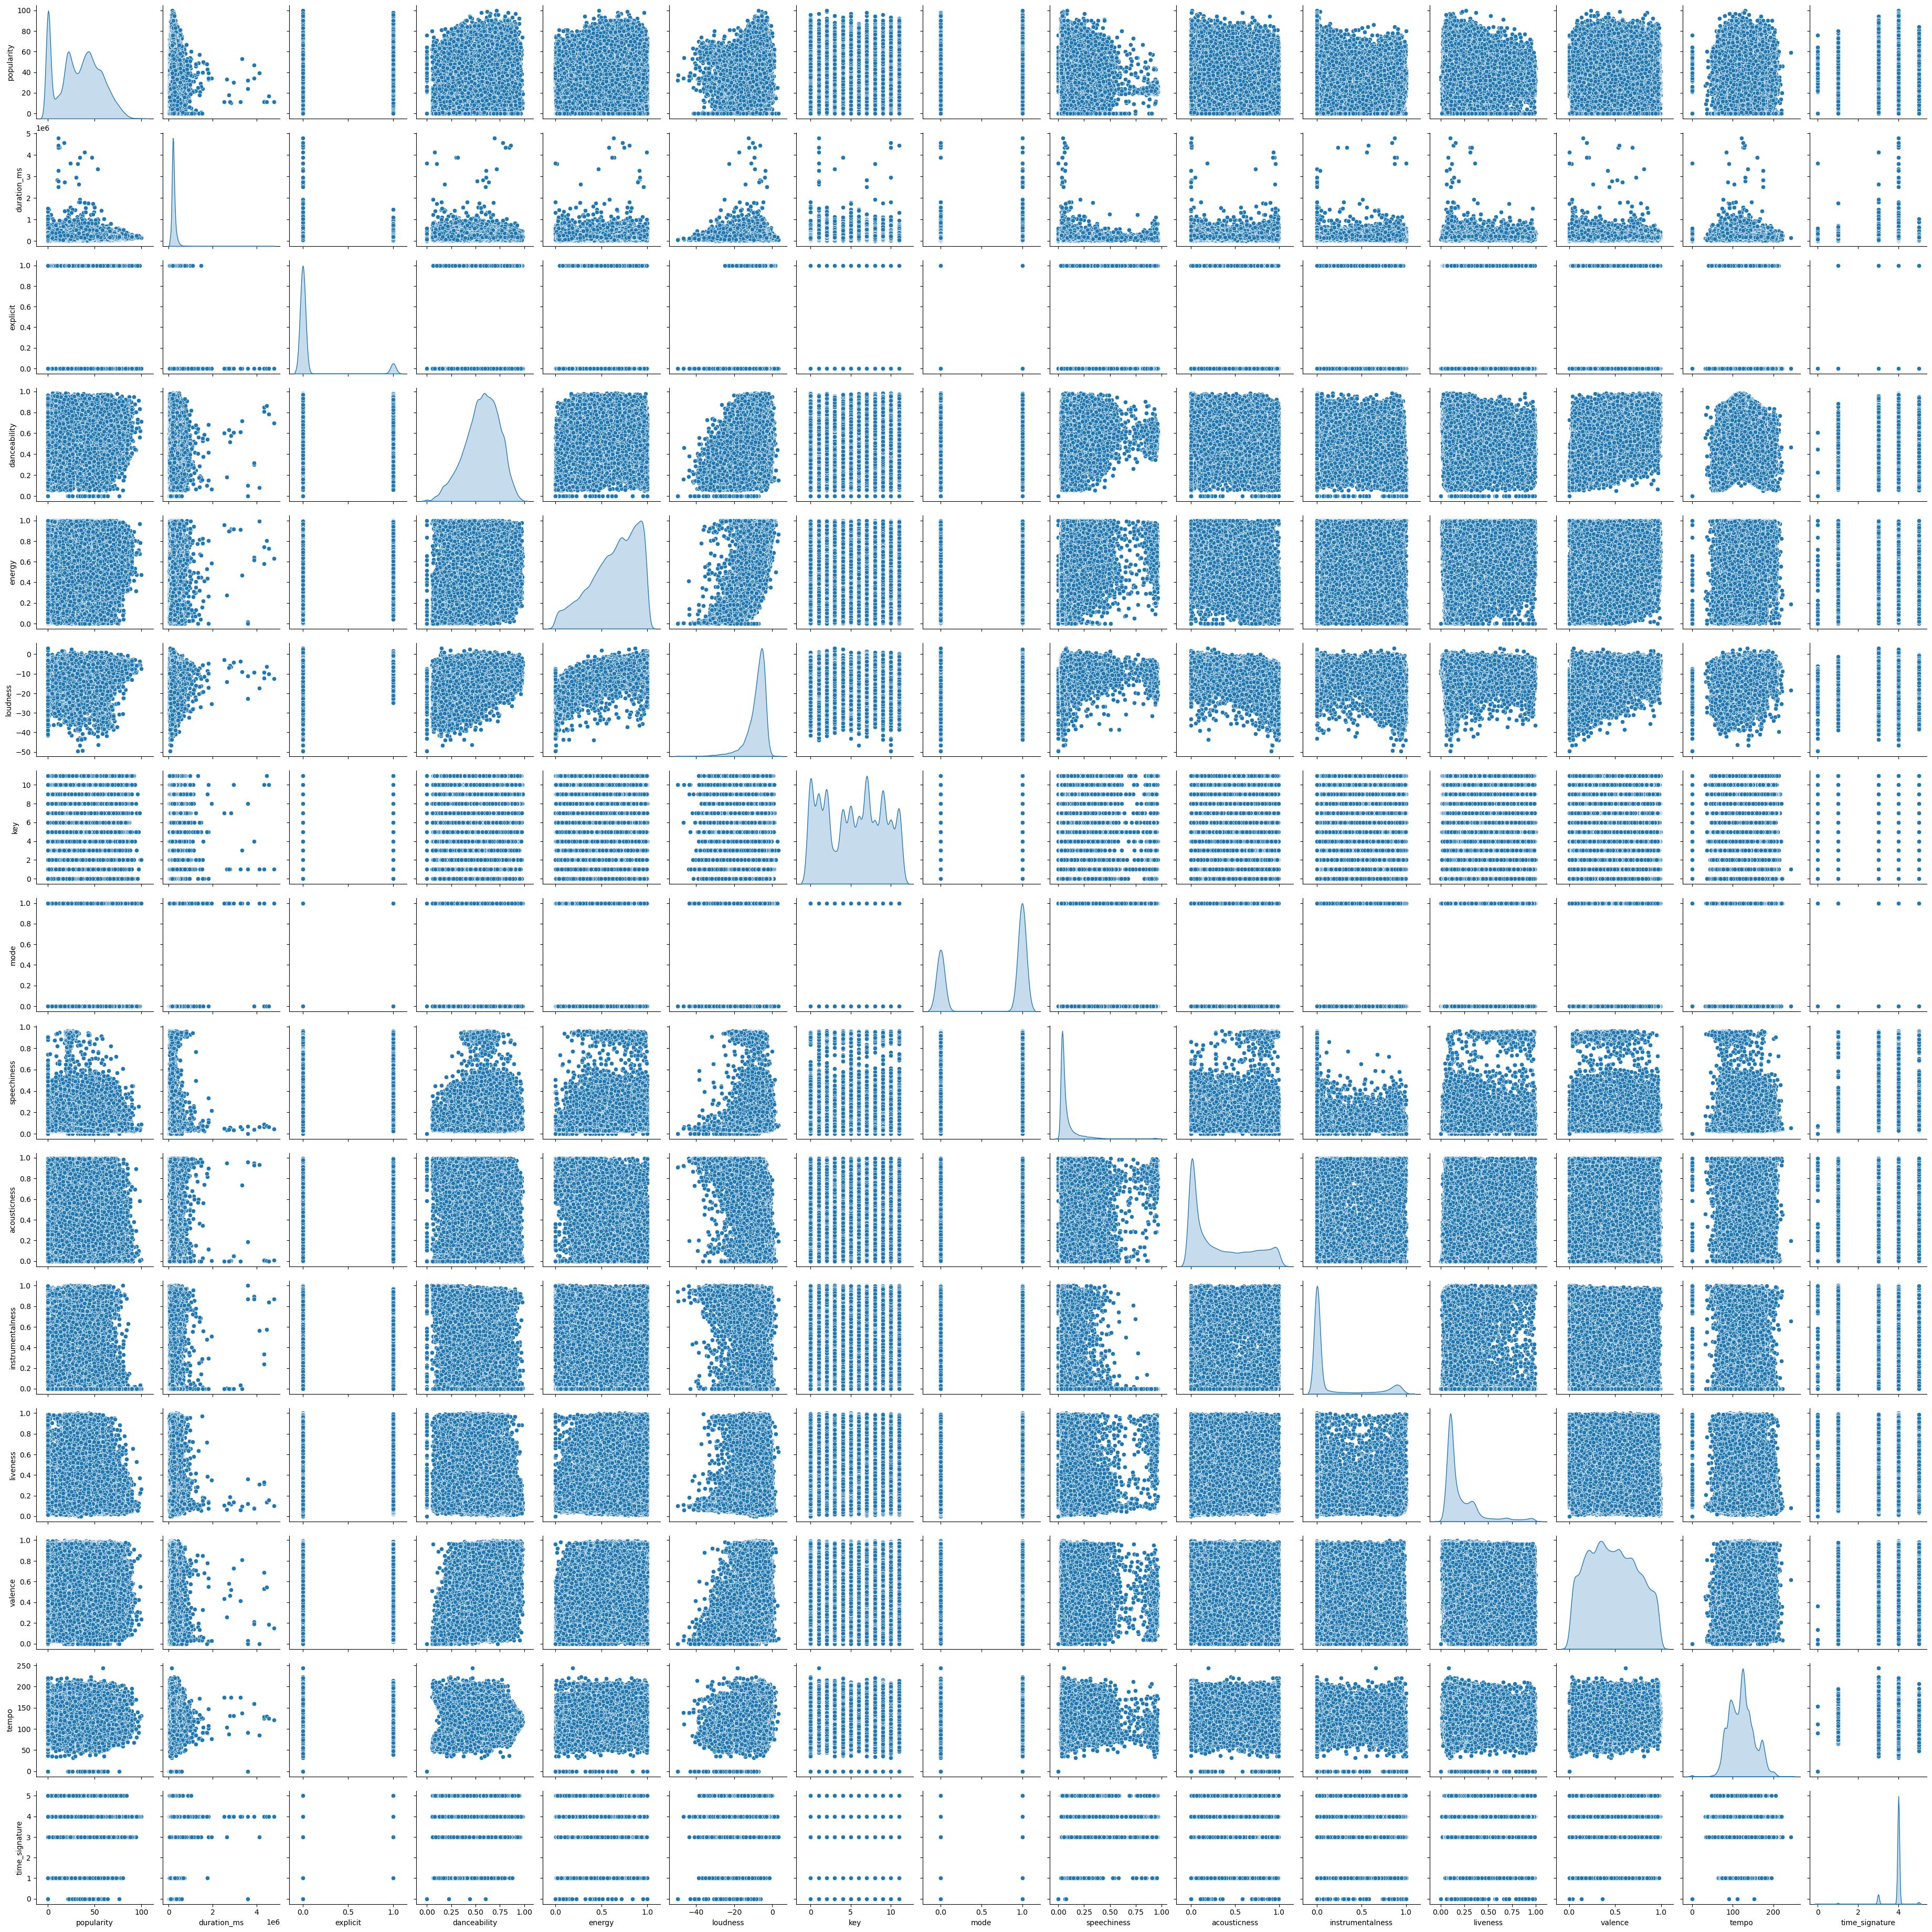

In [15]:
#sns.pairplot(train_dataset[['popularity',
#       'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'key',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']], diag_kind="kde")

In [16]:
train_dataset = train_dataset.drop(['album_name','track_name','duration_ms', 'key','liveness'],axis=1)

In [17]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

count        mean        std     min      25%        50%  \
popularity        72959.0   33.331529  22.294772   0.000  17.0000   35.00000   
explicit          72959.0    0.086501   0.281104   0.000   0.0000    0.00000   
danceability      72959.0    0.567351   0.173699   0.000   0.4560    0.58100   
energy            72959.0    0.641243   0.251494   0.000   0.4730    0.68400   
loudness          72959.0   -8.266214   5.055703 -49.531 -10.0200   -7.00000   
mode              72959.0    0.637564   0.480707   0.000   0.0000    1.00000   
speechiness       72959.0    0.084279   0.104907   0.000   0.0359    0.04890   
acousticness      72959.0    0.314746   0.332257   0.000   0.0170    0.16900   
instrumentalness  72959.0    0.155217   0.309202   0.000   0.0000    0.00004   
valence           72959.0    0.474543   0.259265   0.000   0.2600    0.46400   
tempo             72959.0  122.131050  30.012755   0.000  99.0850  122.01500   
time_signature    72959.0    3.904672   0.431274   0.000   4.0000    4.00000   

                       75%      max  
popularity         50.0000  100.000  
explicit            0.0000    1.000  
danceability        0.6960    0.985  
energy              0.8530    1.000  
loudness           -4.9995    3.156  
mode                1.0000    1.000  
speechiness         0.0842    0.965  
acousticness        0.5970    0.996  
instrumentalness    0.0461    1.000  
valence             0.6830    0.995  
tempo             140.0800  243.372  
time_signature      4.0000    5.000

In [18]:
train_dataset.shape

(72959, 15)

# Normalizando los datos


In [19]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.describe().transpose()

count          mean  std       min       25%       50%  \
acousticness      72959.0  8.131865e-15  1.0 -0.947298 -0.896133 -0.438656   
danceability      72959.0  5.179309e-14  1.0 -3.266287 -0.641055  0.078581   
energy            72959.0 -8.411438e-15  1.0 -2.549740 -0.668977  0.170011   
explicit          72959.0 -5.074988e-16  1.0 -0.307718 -0.307718 -0.307718   
instrumentalness  72959.0  9.368210e-15  1.0 -0.501991 -0.501991 -0.501861   
loudness          72959.0  2.202361e-14  1.0 -8.162027 -0.346893  0.250453   
mode              72959.0 -3.361163e-15  1.0 -1.326303 -1.326303  0.753965   
popularity        72959.0  1.967690e-16  1.0 -1.495038 -0.732527  0.074837   
speechiness       72959.0  2.089112e-14  1.0 -0.803361 -0.461155 -0.337236   
tempo             72959.0 -8.041646e-15  1.0 -4.069305 -0.767875 -0.003867   
time_signature    72959.0  1.639771e-15  1.0 -9.053806  0.221037  0.221037   
valence           72959.0 -2.344053e-14  1.0 -1.830338 -0.827504 -0.040665   

                       75%       max  
acousticness      0.849504  2.050381  
danceability      0.740646  2.404445  
energy            0.841996  1.426504  
explicit         -0.307718  3.249687  
instrumentalness -0.352897  2.732141  
loudness          0.646144  2.259273  
mode              0.753965  0.753965  
popularity        0.747640  2.990319  
speechiness      -0.000749  8.395221  
tempo             0.598044  4.039647  
time_signature    0.221037  2.539748  
valence           0.804030  2.007430

# Construyendo el modelo

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])